# Prediction Analysis on Student's Dropout

In [1]:
# Importing relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
sns.set()


#Installing dependencies
!pip install -U kaleido

In [2]:
# Read dataset from csv file
data =  pd.read_csv("student's dropout dataset.csv")

# Correcting typographical error for nationality
data.rename(columns = {'Nacionality':'Nationality'}, inplace = True)
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nationality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


## Descriptive analysis

In [3]:
# shape of data
data.shape

(4424, 35)

We have 4,424 observations (rows) and 35 features (Columns)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nationality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

The results shows that all columns are numerical except the target column

In [5]:
# descriptive analysis
pd.set_option('display.max_columns', None)
data.describe(include = 'all')

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nationality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Graduate
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2209
mean,1.178571,6.886980,1.727848,9.899186,0.890823,2.531420,1.254521,12.322107,16.455244,7.317812,7.819168,0.548373,0.011528,0.113698,0.880651,0.351718,0.248418,23.265145,0.024864,0.709991,6.270570,8.299051,4.706600,10.640822,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969,NaN
std,0.605747,5.298964,1.313793,4.331792,0.311897,3.963707,1.748447,9.026251,11.044800,3.997828,4.856692,0.497711,0.106760,0.317480,0.324235,0.477560,0.432144,7.587816,0.155729,2.360507,2.480178,4.179106,3.094238,4.843663,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935,NaN
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,NaN
25%,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,3.000000,5.000000,5.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,19.000000,0.000000,0.000000,5.000000,6.000000,3.000000,11.000000,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000,NaN
50%,1.000000,8.000000,1.000000,10.000000,1.000000,1.000000,1.000000,13.000000,14.000000,6.000000,8.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,20.000000,0.000000,0.000000,6.000000,8.000000,5.000000,12.285714,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000,NaN
75%,1.000000,12.000000,2.000000,13.000000,1.000000,1.000000,1.000000,22.000000,27.000000,10.000000,10.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,25.000000,0.000000,0.000000,7.000000,10.000000,6.000000,13.400000,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000,NaN


In [6]:
#Checking for null values
data.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nationality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

No null values present in the data set

#Exploratory Data Analysis

The majority of categorical variables in the downloaded dataset have already been converted to numerical format. However, for the purpose of exploratory data analysis (EDA), we will revert certain columns to their original categorical form.

In [7]:
# Create a copy for exploratory data analysis
data_viz = data.copy()

## Target Variable
First we explore the values in the target variable

In [8]:
data['Target'].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

From the target column we can infer the following:
* Dropout: This means for that particular observation, the student dropped out
* Graduate: The student is a graduate
* Enrolled: The student is currently enrolled

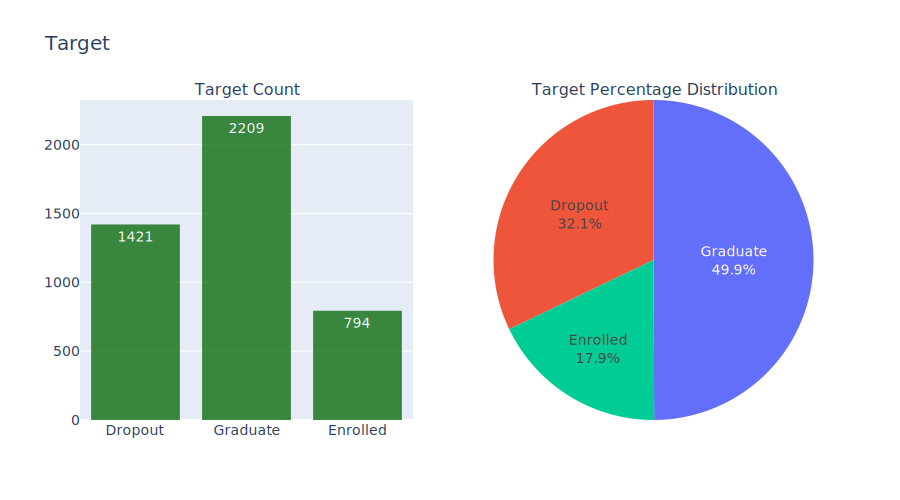

In [9]:
fig = make_subplots(rows=1, cols=2, subplot_titles=['Target Count','Target Percentage Distribution'],
                    specs=[[{'type': 'histogram'},{'type': 'pie'}]])

# Histogram for Target
trace1 = go.Histogram(x = data_viz['Target'], opacity = 0.75, marker_color = 'darkgreen', texttemplate="%{y}")

# Pie chart for Target
trace2 = go.Pie(values = data_viz['Target'].value_counts(),
                labels = ['Graduate', 'Dropout', 'Enrolled'],
                textposition = 'inside', textinfo='percent+label')

fig.add_trace(trace1, row=1, col=1)
fig.add_trace(trace2, row=1, col=2)

fig.update_layout(height=500, width=900,
                  title='Target',
                  showlegend = False,
                  font=dict(size=14))

fig.write_image('fig.svg', engine='kaleido')
fig.show('svg')

**Observation**
* The graph shows that majority of the students are Graduates
* There are also more Dropouts than those currently Enrolled

## Age distribution of students

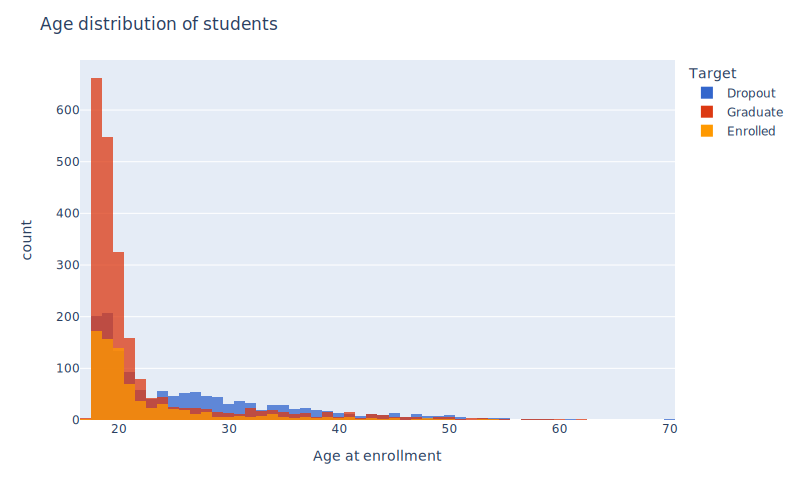

In [10]:
# Histogram for Age
fig = px.histogram(data_viz, x='Age at enrollment', color = 'Target',
                   opacity = 0.75, barmode = 'overlay',
                    width = 800, height = 500, color_discrete_sequence=px.colors.qualitative.G10)
fig.update_layout(title='Age distribution of students')
fig.write_image('fig.svg', engine='kaleido')
fig.show('svg')

**Observation**

* Distribution shows that majority of the students are in their late teen's to early 20's
* It is also observed that there was an increase in dropout rate from mid 20's to early 30's

For the next set of data visualizations, we would be dealing with pie charts mostly. To reduce repeatability of code, two functions are create; one to create dictionaries of all categories with respect to number of students enrolled, dropped out or are graduates.

The second function would be to create pie charts based on the dictionaries created for visualization.

In [11]:
def get_dictionaries(category_list, dfcolumn_name, target_col, dictionary_list):
  '''This function returns a list of dictionaries for value count of each target label per category'''
  for each_category in category_list:
    a_dictionary = dict(data_viz[data_viz[dfcolumn_name]== each_category][target_col].value_counts())
    dictionary_list.append(a_dictionary)
  return dictionary_list

In [12]:
def make_pie(dictionary_list, trace_list, colors_list):
  '''This function returns a list of traces for pie charts'''
  for dictionary in dictionary_list:
    trace = go.Pie(values = list(dictionary.values()), labels = list(dictionary.keys()),
           textposition = 'inside', textinfo='percent+label',
           marker=dict(colors=colors_list))
    trace_list.append(trace)
  return trace_list



## Gender distribution of students
The following represents the Gender for each student:

1. Male
2. Female

This will be converted back for visualization purposes

In [13]:
# Change gender from numerical to catgorical
data_viz['Gender'] = data_viz['Gender'].map({1:'Male', 0:'Female'})

In [14]:
# Getting dictionaries for genders
genders = data_viz['Gender'].unique()
genders_dictionaries = get_dictionaries(genders, 'Gender', 'Target', [])
genders_dictionaries

[{'Dropout': 701, 'Graduate': 548, 'Enrolled': 307},
 {'Graduate': 1661, 'Dropout': 720, 'Enrolled': 487}]

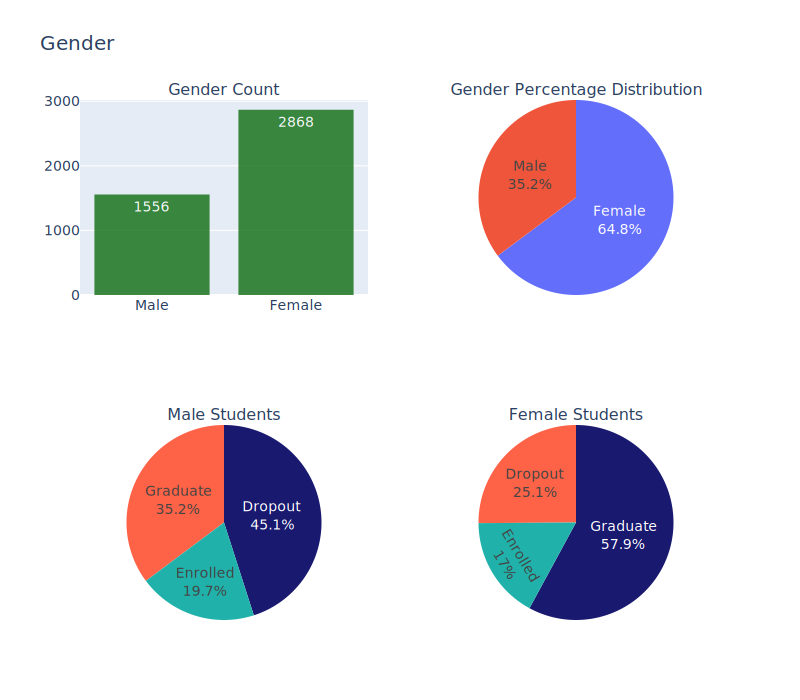

In [15]:
# Creating subplots for Gender distribution of students
fig = make_subplots(rows=2, cols=2, subplot_titles=['Gender Count','Gender Percentage Distribution', 'Male Students', 'Female Students'],
                    specs=[[{'type': 'histogram'},{'type': 'pie'}], [{'type': 'pie'}, {'type': 'pie'}]])

# Histogram for Gender
trace1 = go.Histogram(x = data_viz['Gender'], opacity = 0.75, marker_color = 'darkgreen', texttemplate="%{y}")

# Pie chart for genders
trace2 = go.Pie(values = data_viz['Gender'].value_counts(), labels = ['Female', 'Male'],
                            textposition = 'inside', textinfo='percent+label')

#Creating list of traces
traces = [trace1, trace2]

# Adding pie charts for both male and female students
make_pie(genders_dictionaries, traces, ['midnightblue', 'tomato', 'lightseagreen'])

# Adding the histogram and pie chart
fig.add_trace(traces[0], row=1, col=1)
fig.add_trace(traces[1], row=1, col=2)
fig.add_trace(traces[2], row=2, col=1)
fig.add_trace(traces[3], row=2, col=2)

fig.update_layout(height=700, width=800,
                  title='Gender',
                  showlegend = False,
                  font=dict(size=14))

fig.write_image('fig.svg', engine='kaleido')
fig.show('svg')

**Observation**
* There was a significant number of female students (64.8%) compared to the males (35.2%).
* Also it is observed that there was a higher rate of dropout students that were male (45.1%), compared to the females (25.1%).

## Attendance
This feature represents whether the student attends classes during the day (1) or in the evening (0).

This would be converted back for visualization purposes.

In [16]:
# Daytime/evening attendance is converted to day and night
data_viz['Daytime/evening attendance'] = data_viz['Daytime/evening attendance'].map({1: 'Daytime attendance', 0: 'Nightime attendance'})

In [17]:
# Getting dictionaries for attendance
attendance = data_viz['Daytime/evening attendance'].unique()
attendance_dictionaries = get_dictionaries(attendance, 'Daytime/evening attendance', 'Target', [])
attendance_dictionaries

[{'Graduate': 2008, 'Dropout': 1214, 'Enrolled': 719},
 {'Dropout': 207, 'Graduate': 201, 'Enrolled': 75}]

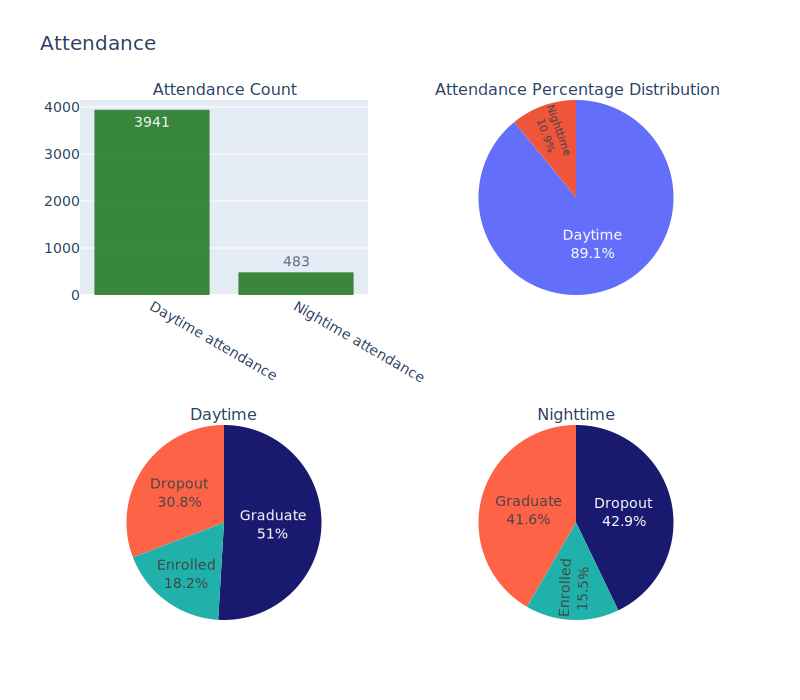

In [18]:
# Creating subplots for Attendance of students
fig = make_subplots(rows=2, cols=2, subplot_titles=['Attendance Count','Attendance Percentage Distribution', 'Daytime', 'Nighttime'],
                    specs=[[{'type': 'histogram'},{'type': 'pie'}], [{'type': 'pie'}, {'type': 'pie'}]])

# Histogram and pie chart for Attendance
trace1 = go.Histogram(x = data_viz['Daytime/evening attendance'], opacity = 0.75, marker_color = 'darkgreen', texttemplate="%{y}")
trace2 = go.Pie(values = data_viz['Daytime/evening attendance'].value_counts(), labels = ['Daytime', 'Nighttime'],
                            textposition = 'inside', textinfo='percent+label')

#Creating list of traces
traces = [trace1, trace2]

# Adding pie charts for male and female students
make_pie(attendance_dictionaries, traces, ['midnightblue', 'tomato', 'lightseagreen'])

# Adding the histogram and pie chart
fig.add_trace(traces[0], row=1, col=1)
fig.add_trace(traces[1], row=1, col=2)
fig.add_trace(traces[2], row=2, col=1)
fig.add_trace(traces[3], row=2, col=2)

fig.update_layout(height=700, width=800,
                  title='Attendance',
                  showlegend = False,
                  font=dict(size=14))

fig.write_image('fig.svg', engine='kaleido')
fig.show('svg')

**Observation**

Vast Majority (89.1%) of the students attended day time classes, however there seems to be about 12.1% increase in the dropout rate for night time students comapared to the day time students.

## Students courses
The following numbers represents the courses taken by each student:
1. Biofuel Production Technologies
2. Animation and Multimedia Design
3. Social Service (evening attendance)
4. Agronomy
5. Communication Design
6. Veterinary Nursing
7. Informatics Engineering
8. Equiniculture
9. Management
10. Social Service
11. Tourism
12. Nursing
13. Oral Hygiene
14. Advertising and Marketing Management
15. Journalism and Communication
16. Basic Education
17. Management (evening attendance)

These values are converted back for visualization purposes.

In [19]:
# Converting the courses back
data_viz['Course'] = data_viz['Course'].map({1: 'Biofuel Production Technologies',
 2: 'Animation and Multimedia Design', 3: 'Social Service (evening attendance)',
 4: 'Agronomy', 5: 'Communication Design', 6: 'Veterinary Nursing',
 7: 'Informatics Engineering', 8: 'Equiniculture', 9: 'Management',
 10: 'Social Service', 11: 'Tourism', 12: 'Nursing', 13: 'Oral Hygiene',
 14: 'Advertising and Marketing Management', 15: 'Journalism and Communication',
 16: 'Basic Education', 17: 'Management (evening attendance)'})

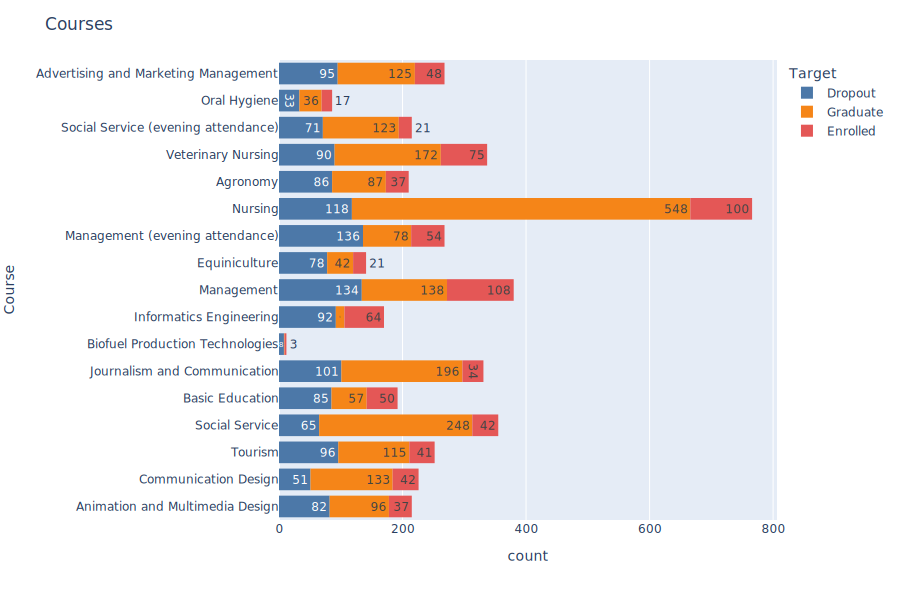

In [20]:
# Histogram plot for students coursess
fig = px.histogram(data_viz, y='Course', color = 'Target',
                   width = 900, height = 600, text_auto=True, color_discrete_sequence=px.colors.qualitative.T10)
fig.update_layout(title='Courses')
fig.write_image('fig.svg', engine='kaleido')
fig.show('svg')


**Observation**

The course that had the highest number of dropouts was **Management with evening attendance (136)**

For the next set of visualization, we will be dealing with a lot of pie charts,
a function is created to simplify the process and reduce repeatability.

In [21]:
def sub_plots(chart_to_plot, row, col):
  '''This function generates the list of subplots'''
  cols = chart_to_plot * col
  rows = [cols] * row
  return rows


## Martial status

The following numbers represents the marital status for each student:

1. Single
2. Married
3. Widower
4. Divorced
5. Facto union
6. Legally separated

These values are converted back for visualization purposes

In [22]:
data_viz['Marital status'] = data_viz['Marital status'].map({1:'Single', 2: 'Married',
                                                             3: 'Widower', 4: 'Divorced',
                                                             5: 'Facto union', 6: 'Legally Separated'})

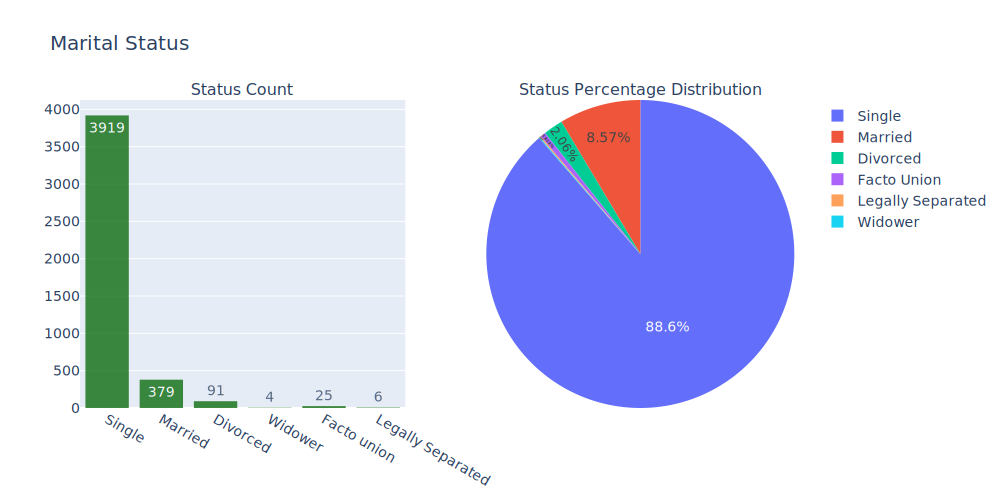

In [23]:
fig = make_subplots(rows=1, cols=2, subplot_titles=['Status Count','Status Percentage Distribution'],
                    specs=[[{'type': 'histogram'},{'type': 'pie'}]])

# Histogram for marital status
trace1 = go.Histogram(x = data_viz['Marital status'], opacity = 0.75, marker_color = 'darkgreen', texttemplate="%{y}", showlegend=False)

#Pie chart for marital status
trace2 = go.Pie(values = data_viz['Marital status'].value_counts(),
                labels = ['Single', 'Married', 'Divorced', 'Facto Union', 'Legally Separated', 'Widower'],
                textposition = 'inside', textinfo='percent')

fig.add_trace(trace1, row=1, col=1)
fig.add_trace(trace2, row=1, col=2)

fig.update_layout(height=500, width=1000,
                  title='Marital Status',
                  # showlegend = False,
                  font=dict(size=14))

fig.write_image('fig.svg', engine='kaleido')
fig.show('svg')

In [24]:
# Getting dictionaries for each marital status
status = data_viz['Marital status'].unique()
status_dictionaries = get_dictionaries(status, 'Marital status', 'Target', [])
status_dictionaries

[{'Graduate': 2015, 'Dropout': 1184, 'Enrolled': 720},
 {'Dropout': 179, 'Graduate': 148, 'Enrolled': 52},
 {'Dropout': 42, 'Graduate': 33, 'Enrolled': 16},
 {'Enrolled': 2, 'Dropout': 1, 'Graduate': 1},
 {'Dropout': 11, 'Graduate': 11, 'Enrolled': 3},
 {'Dropout': 4, 'Graduate': 1, 'Enrolled': 1}]

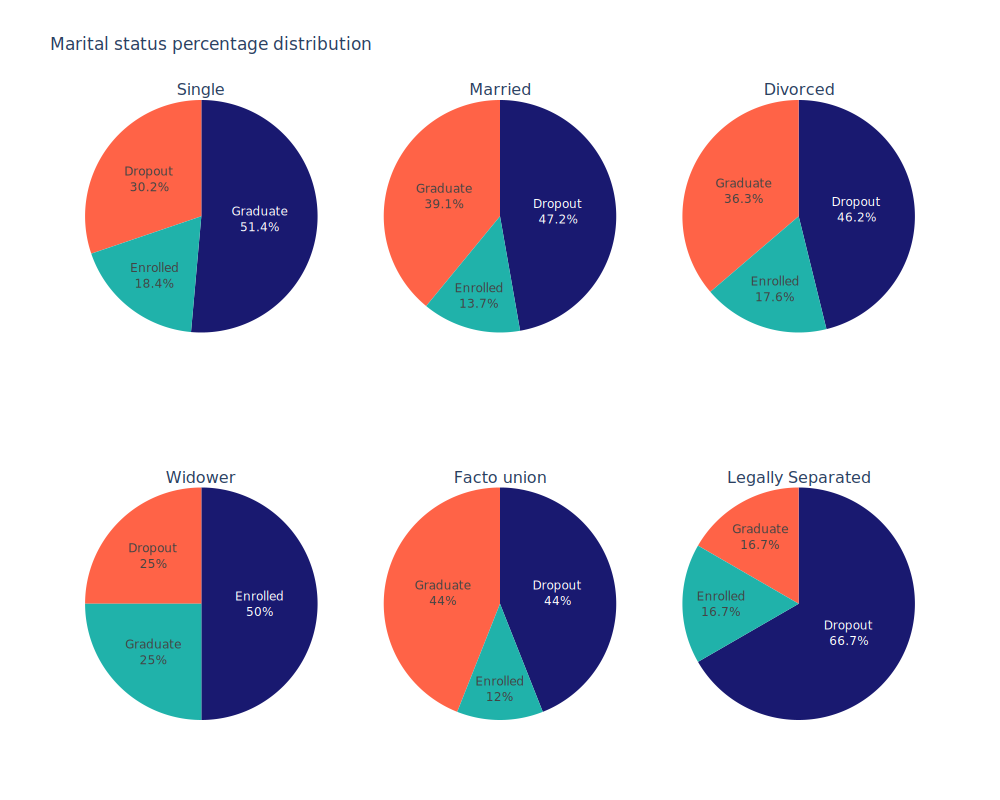

In [25]:
fig = make_subplots(rows=2, cols=3, subplot_titles = status, specs= sub_plots([{'type':'pie'}], 2,3))

#Creating list of traces
traces = []

# Adding pie charts for male and female students
make_pie(status_dictionaries, traces, ['midnightblue', 'tomato', 'lightseagreen'])

# Adding the histogram and pie chart
fig.add_trace(traces[0], row=1, col=1)
fig.add_trace(traces[1], row=1, col=2)
fig.add_trace(traces[2], row=1, col=3)
fig.add_trace(traces[3], row=2, col=1)
fig.add_trace(traces[4], row=2, col=2)
fig.add_trace(traces[5], row=2, col=3)

fig.update_layout(height=800, width=1000, title='Marital status percentage distribution', showlegend = False)

fig.write_image('fig.svg', engine='kaleido')
fig.show('svg')

**Observation**

* Vast majority of the students are **single**, however **30.2%** of single students droppout.
* Another thing to note is that **legally seperated students (66.7%)** had the highest percentage of dropouts followed by **Married students (47.2%)**.

## Other Categories
The following columns/features have unique values of 0 and 1

* Displaced
* Educational special needs
* Debtor
* Tuition fees up to date
* Scholarship holder
* International

For the purpose of EDA we will convert these values to categorical values 'Yes' and 'No' for easy visualization

In [26]:
to_convert = ['Displaced', 'Educational special needs',
       'Debtor', 'Tuition fees up to date', 'Scholarship holder', 'International']
for i in to_convert:
    data_viz[i] = data_viz[i].map({1:'Yes', 0: 'No'})

In [27]:
# Getting dictionaries for displaced/ not displaced students
displaced = data_viz['Displaced'].unique()
displaced_dictionaries = get_dictionaries(displaced, 'Displaced', 'Target', [])
displaced_dictionaries

[{'Graduate': 1324, 'Dropout': 669, 'Enrolled': 433},
 {'Graduate': 885, 'Dropout': 752, 'Enrolled': 361}]

In [28]:
# Getting dictionaries for international/non international students
international = data_viz['International'].unique()
international_dictionaries = get_dictionaries(international, 'International', 'Target', [])
international_dictionaries


[{'Graduate': 2155, 'Dropout': 1389, 'Enrolled': 770},
 {'Graduate': 54, 'Dropout': 32, 'Enrolled': 24}]

In [29]:
# Getting dictionaries for students in debt/ not in debt
debt = data_viz['Debtor'].unique()
debt_dictionaries = get_dictionaries(debt, 'Debtor', 'Target', [])
debt_dictionaries

[{'Graduate': 2108, 'Dropout': 1109, 'Enrolled': 704},
 {'Dropout': 312, 'Graduate': 101, 'Enrolled': 90}]

In [30]:
# Getting dictionaries for students with tuition fees paid/ not paid
tuition = data_viz['Tuition fees up to date'].unique()
tuition_dictionaries = get_dictionaries(tuition, 'Tuition fees up to date', 'Target', [])
tuition_dictionaries

[{'Graduate': 2180, 'Dropout': 964, 'Enrolled': 752},
 {'Dropout': 457, 'Enrolled': 42, 'Graduate': 29}]

In [31]:
# Getting dictionaries for students with educational needs/ no educational needs
education_needs = data_viz['Educational special needs'].unique()
education_needs_dictionaries = get_dictionaries(education_needs, 'Educational special needs', 'Target', [])
education_needs_dictionaries

[{'Graduate': 2186, 'Dropout': 1404, 'Enrolled': 783},
 {'Graduate': 23, 'Dropout': 17, 'Enrolled': 11}]

In [32]:
# Getting dictionaries for students with scholarship/ no scholarship
scholarship = data_viz['Scholarship holder'].unique()
scholarship_dictionaries = get_dictionaries(scholarship, 'Scholarship holder', 'Target', [])
scholarship_dictionaries

[{'Graduate': 1374, 'Dropout': 1287, 'Enrolled': 664},
 {'Graduate': 835, 'Dropout': 134, 'Enrolled': 130}]

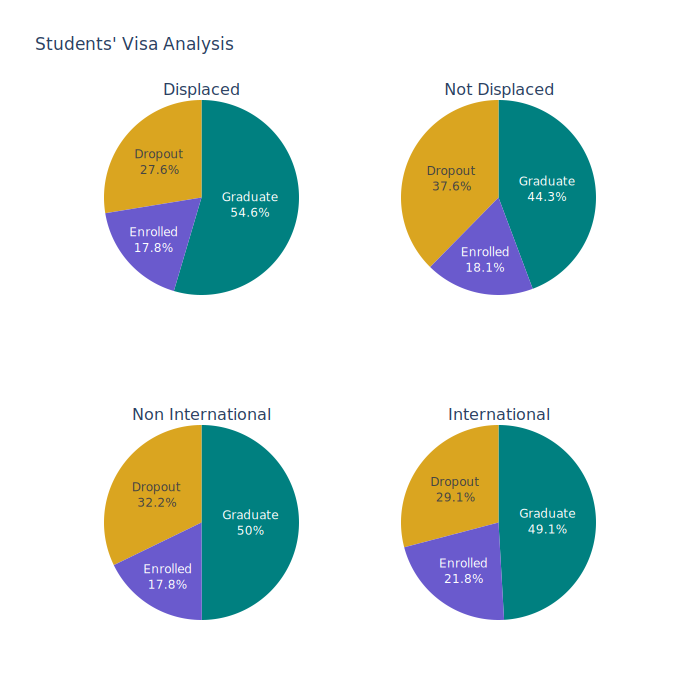

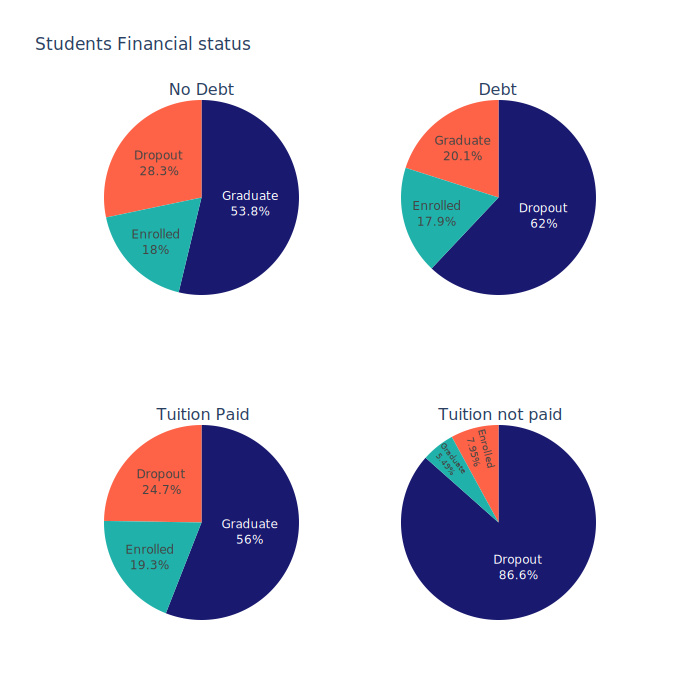

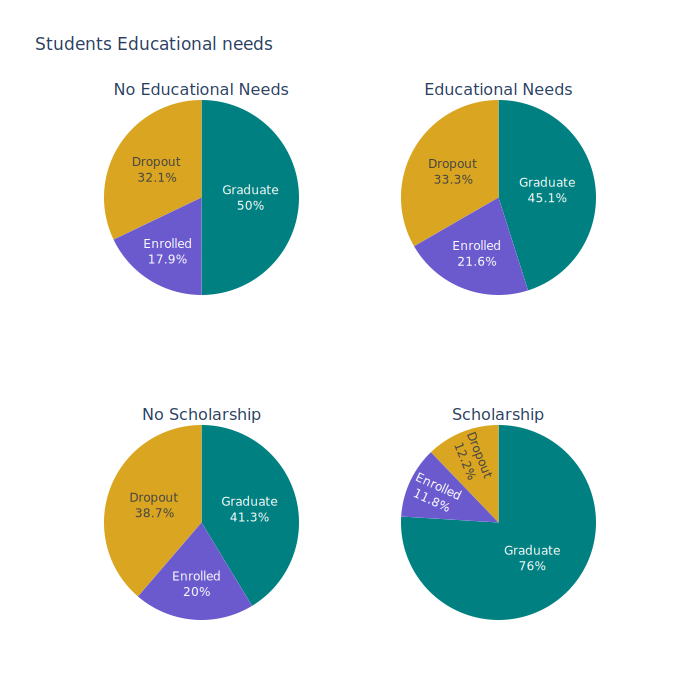

In [33]:
fig = make_subplots(rows=2, cols=2, subplot_titles = ['Displaced', 'Not Displaced', 'Non International', 'International'], specs= sub_plots([{'type':'pie'}], 2,2))

#Creating list of traces
traces = []

# Adding pie charts for male and female students
make_pie(displaced_dictionaries, traces, ['teal', 'goldenrod', 'slateblue'])
make_pie(international_dictionaries, traces, ['teal', 'goldenrod', 'slateblue'])



# Adding the histogram and pie chart
fig.add_trace(traces[0], row=1, col=1)
fig.add_trace(traces[1], row=1, col=2)
fig.add_trace(traces[2], row=2, col=1)
fig.add_trace(traces[3], row=2, col=2)

fig.update_layout(title="Students' Visa Analysis", height=700, width=700, showlegend = False)
fig.write_image('fig.svg', engine='kaleido')
fig.show('svg')


fig = make_subplots(rows=2, cols=2, subplot_titles = ['No Debt', 'Debt', 'Tuition Paid', 'Tuition not paid'], specs= sub_plots([{'type':'pie'}], 2,2))

#Creating list of traces
traces = []

make_pie(debt_dictionaries, traces, ['midnightblue', 'tomato', 'lightseagreen'])
make_pie(tuition_dictionaries, traces, ['midnightblue', 'tomato', 'lightseagreen'])

# Adding the histogram and pie chart
fig.add_trace(traces[0], row=1, col=1)
fig.add_trace(traces[1], row=1, col=2)
fig.add_trace(traces[2], row=2, col=1)
fig.add_trace(traces[3], row=2, col=2)


fig.update_layout(title="Students Financial status", height=700, width=700, showlegend = False)
fig.write_image('fig.svg', engine='kaleido')
fig.show('svg')


fig = make_subplots(rows=2, cols=2, subplot_titles = ['No Educational Needs', 'Educational Needs', 'No Scholarship', 'Scholarship'], specs= sub_plots([{'type':'pie'}], 2,2))

#Creating list of traces
traces = []

make_pie(education_needs_dictionaries, traces, ['teal', 'goldenrod', 'slateblue'])
make_pie(scholarship_dictionaries, traces, ['teal', 'goldenrod', 'slateblue'])

# Adding the histogram and pie chart
fig.add_trace(traces[0], row=1, col=1)
fig.add_trace(traces[1], row=1, col=2)
fig.add_trace(traces[2], row=2, col=1)
fig.add_trace(traces[3], row=2, col=2)


fig.update_layout(title="Students Educational needs", height=700, width=700, showlegend = False)


fig.write_image('fig.svg', engine='kaleido')
fig.show('svg')

**Observation**

From the pie chart, we can see students who were **not displaced** had a higher dropout rate **(37.6%)** compared to students who were **displaced (27.6%)**

Also, **non-international students** had a higher dropout rate of **32.2%** compared to **international students** who had **29.1%**.

Unsurprisingly, students who were in **debt** and had not completed payment for **tuition** had a higher dropout rate of **62% and 86.6%** respectively.

Similarly, students who were granted **scholarships** had a low dropout rate of **12.2%** compared to those who were not given **(38.7%)**.

The educational needs of the students didn't seem to be a significant factor because students with and without educational needs had a 33.3% and 32.1% dropout rate respectively. The column would be dropped before training the model

## Economic Factors

The economic factors presented in this data set are inflation rate, unemployment rate and Gross domestic product (GDP).

We will analyse these factors using histogram plots

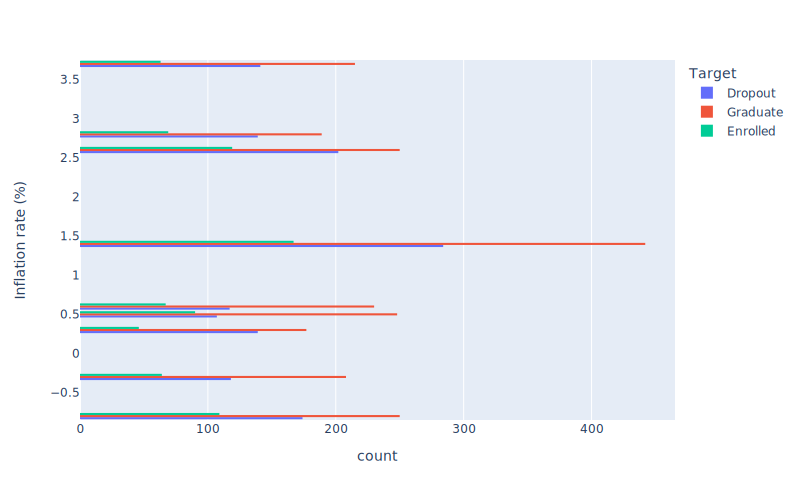

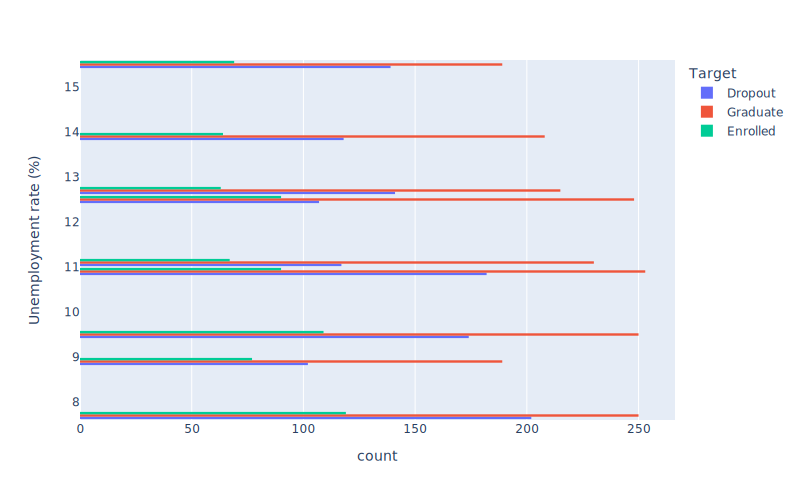

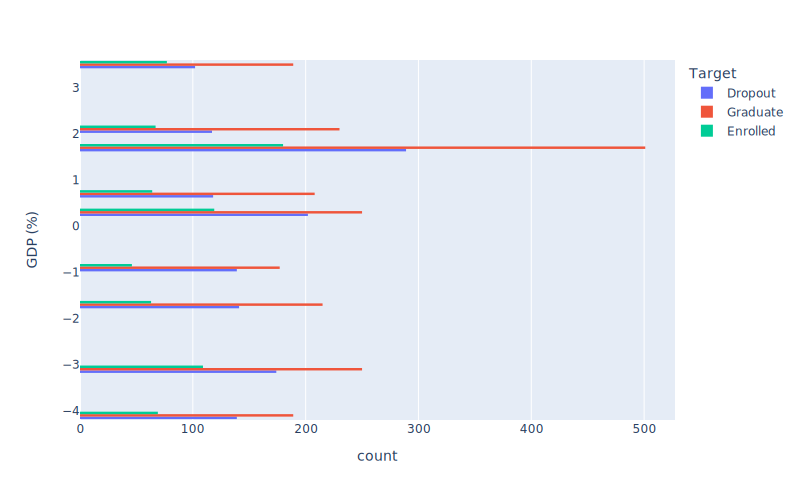

In [34]:
# Histogram plot for Inflation
fig = px.histogram(data_viz, y='Inflation rate', color='Target', barmode='group',
                   height=500, width=800)

fig.update_yaxes(title_text='Inflation rate (%)')
fig.write_image('fig.svg', engine='kaleido')
fig.show('svg')

# Histogram plot for Unemployment
fig = px.histogram(data_viz, y= 'Unemployment rate', color = 'Target', barmode = 'group',
                  height = 500, width = 800)

fig.update_yaxes(title_text='Unemployment rate (%)')
fig.write_image('fig.svg', engine='kaleido')
fig.show('svg')

# Histogram plot for GDP
fig = px.histogram(data_viz, y= 'GDP', color = 'Target', barmode = 'group',
                  height = 500,  width = 800)

fig.update_yaxes(title_text='GDP (%)')
fig.write_image('fig.svg', engine='kaleido')
fig.show('svg')

**Observation**
The economic factors does not seem to have an effect on the dropout rate revealing no pattern or meaningful insight.

## Features selection

The easiest way to view how independent features are correlated with each other is through correlation analysis. There are some features that would either have a significant positive correlation or negetive correlation with each other.

This will help in feature selection and determine which independent variables can be dropped to avoid Multicollinearity

We can visualize this using heatmaps

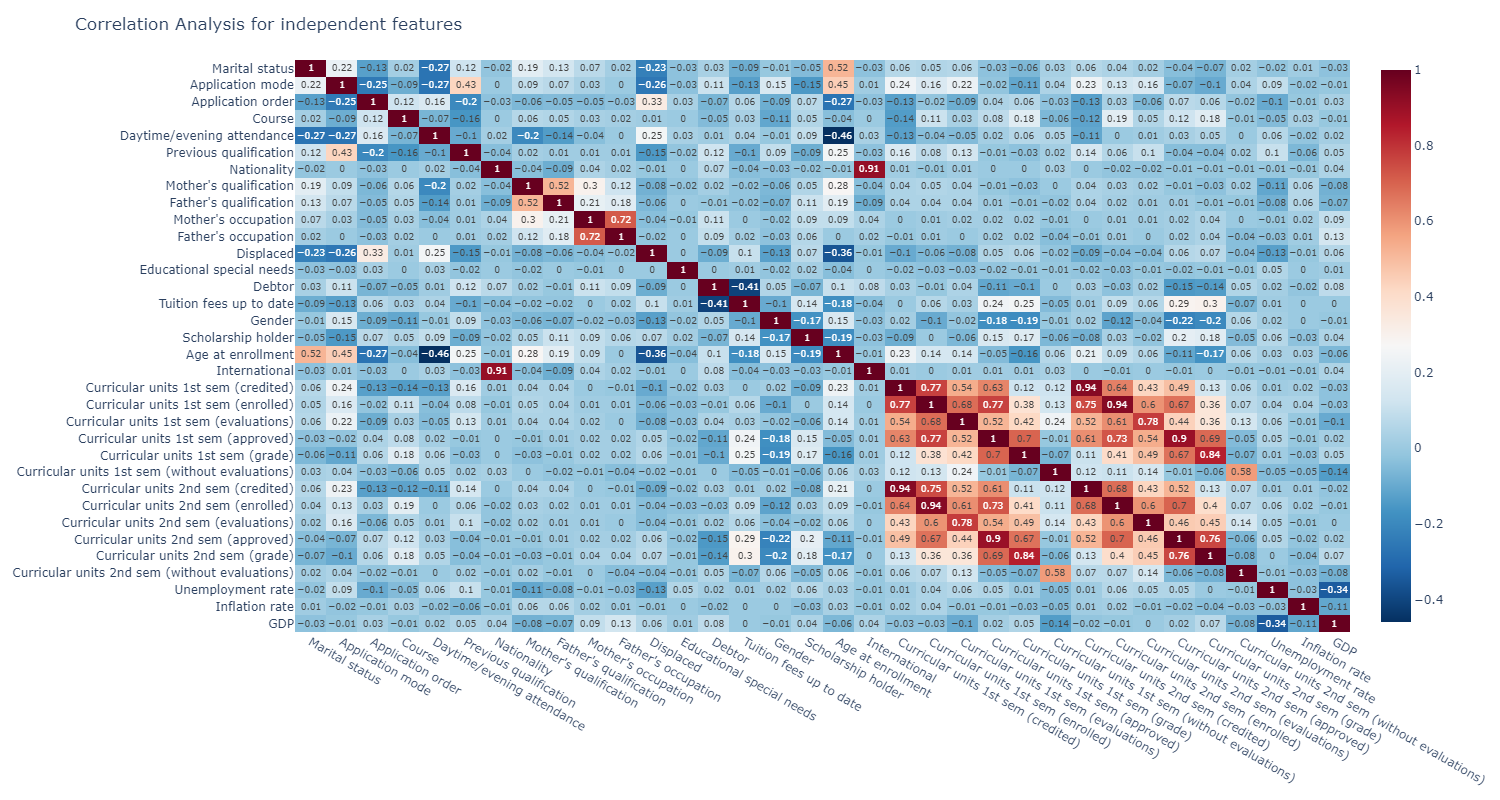

In [35]:
# Heat map showing correlation of features
fig = px.imshow(data.drop('Target', axis = 1).corr().round(2), text_auto=True, aspect="auto", color_continuous_scale='RdBu_r')
fig.update_layout(title = 'Correlation Analysis for independent features', height=800, width=1500)
fig.write_image('fig.png', engine='kaleido')
fig.show('png')

**Observation**:

From the results we can see some features have strong correlation with each other:
* Nationality and International
* Mother's qualification and Father's qualification
* Mother's occupation and Father's occupation
* Curricular Units 1st sem and Curricular Units 2nd sem


The following features would be dropped due to its high correlation:
* Nationality
* Mother's occupation
* Curricular units 1st sem (enrolled)
* Curricular units 1st sem (credited)
* Curricular units 1st sem (evaluations)
* Curricular units 1st sem (approved)
* Curricular units 1st sem (grade)
* Curricular units 1st sem (without evaluations)
* Curricular units 2nd sem (credited)
* Curricular units 2nd sem (enrolled)
* Curricular units 2nd sem (evaluations)
* Curricular units 2nd sem (approved)
* Curricular units 2nd sem (without evaluations)
* Inflation rate
* GDP
* Unemployment rate

In [36]:
# Dropping features
data.drop(['Nationality', 'Educational special needs', 'Mother\'s occupation',
          'Curricular units 1st sem (credited)',
          'Curricular units 1st sem (enrolled)',
          'Curricular units 1st sem (evaluations)',
          'Curricular units 1st sem (without evaluations)',
          'Curricular units 1st sem (approved)',
          'Curricular units 1st sem (grade)',
          'Curricular units 2nd sem (credited)',
          'Curricular units 2nd sem (enrolled)',
          'Curricular units 2nd sem (evaluations)',
          'Curricular units 2nd sem (approved)',
          'Curricular units 2nd sem (without evaluations)',
          'Inflation rate', 'GDP', 'Unemployment rate'], axis = 1, inplace = True)

## Data Processing
 Before standardizing the data we need to figure out relevant features to transform them

 The target feature is in categorical form and needs to be converted numerical data.

In [37]:
#Get dummies for Target columns
dummies = pd.get_dummies(data['Target'])

#Drop all columns except that for Dropout
dummies.drop(['Enrolled',	'Graduate'], axis = 1, inplace= True)
data['Target'] = dummies
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Mother's qualification,Father's qualification,Father's occupation,Displaced,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 2nd sem (grade),Target
0,1,8,5,2,1,1,13,10,10,1,0,1,1,0,20,0,0.000000,1
1,1,6,1,11,1,1,1,3,4,1,0,0,1,0,19,0,13.666667,0
2,1,1,5,5,1,1,22,27,10,1,0,0,1,0,19,0,0.000000,1
3,1,8,2,15,1,1,23,27,4,1,0,1,0,0,20,0,12.400000,0
4,2,12,1,3,0,1,22,28,10,0,0,1,0,0,45,0,13.000000,0


## Preparing the data for model building

### Normalizing data

Before standardizing the data we assigin values to X_features and Y (Target column)

In [38]:
Y = np.array(data['Target'])
X_features = data.drop('Target', axis = 1)
X_features.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Mother's qualification,Father's qualification,Father's occupation,Displaced,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 2nd sem (grade)
0,1,8,5,2,1,1,13,10,10,1,0,1,1,0,20,0,0.000000
1,1,6,1,11,1,1,1,3,4,1,0,0,1,0,19,0,13.666667
2,1,1,5,5,1,1,22,27,10,1,0,0,1,0,19,0,0.000000
3,1,8,2,15,1,1,23,27,4,1,0,1,0,0,20,0,12.400000
4,2,12,1,3,0,1,22,28,10,0,0,1,0,0,45,0,13.000000


In [39]:
Y[:5]

array([1, 0, 1, 0, 0], dtype=uint8)

In [40]:
from sklearn.preprocessing import StandardScaler
scaler =  StandardScaler()
X = scaler.fit_transform(X_features)
X


array([[-0.29482875,  0.21006857,  2.49089589, ..., -0.43036282,
        -0.15968211, -1.96348862],
       [-0.29482875, -0.16740639, -0.55406775, ..., -0.56216796,
        -0.15968211,  0.65956171],
       [-0.29482875, -1.11109377,  2.49089589, ..., -0.56216796,
        -0.15968211, -1.96348862],
       ...,
       [-0.29482875, -1.11109377, -0.55406775, ...,  0.8876885 ,
        -0.15968211,  0.62757329],
       [-0.29482875, -1.11109377, -0.55406775, ..., -0.43036282,
        -0.15968211,  0.33967752],
       [-0.29482875, -0.35614386, -0.55406775, ..., -0.16675256,
         6.26244216,  0.53160803]])

## Using Machine Learning classification models

Since the nature of the target is decision based (Dropout (1) or not (0), we will use the following features to predict the state of a student

In [41]:
# importing model selection
from sklearn.model_selection import train_test_split

# importing evaluation metrics
from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

## Using Logistic Regression

In [42]:

from sklearn.linear_model import LogisticRegression
# Train a logistic regression model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Predict target values for test data
y_pred = lr_model.predict(X_test)

# Confusion Matrix
lr_matrix = confusion_matrix(y_test, y_pred)

# Evaluate the model's accuracy
lr_acc = round(accuracy_score(y_test, y_pred), 3)
print(f'Accuracy of logistic regression model is {lr_acc * 100}%')


Accuracy of logistic regression model is 82.8%


Next we will try other classification models to see if we can achieve a better accuracy

## Using Decision Trees

In [43]:
from sklearn.tree import DecisionTreeClassifier

# Train a Decision tree model
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

# Predict target values for test data
y_pred = tree_model.predict(X_test)

# Confusion Matrix
tree_matrix = confusion_matrix(y_test, y_pred)

# Evaluate the model's accuracy
tree_acc = round(accuracy_score(y_test, y_pred), 3)
print(f'Accuracy of Decision tree model is {tree_acc * 100}%')

Accuracy of Decision tree model is 76.3%


## Using Support Vector Machines

In [44]:
# Iterating to see which kernel gives the best result
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
score_list = {}
scores = 0
from sklearn.svm import SVC

for k in kernels:
    svm_model = SVC(kernel= k)
    svm_model.fit(X_train, y_train)
    f_score = svm_model.score(X_test, y_test)
    score_list.update({k: f_score})

score_list

{'linear': 0.823728813559322,
 'poly': 0.8259887005649718,
 'rbf': 0.8305084745762712,
 'sigmoid': 0.7638418079096045}

The results show that **Rbf** performs the best

In [45]:
# Train a SVC model
svm_model = SVC(kernel = 'rbf')
svm_model.fit(X_train, y_train)

# Predict target values for test data
y_pred = svm_model.predict(X_test)

# Confusion Matrix
svm_matrix = confusion_matrix(y_test, y_pred)

# Evaluate the model's accuracy
svm_acc = round(accuracy_score(y_test, y_pred),3)
print(f'Accuracy of Support vector classifier model is {svm_acc * 100}%')

Accuracy of Support vector classifier model is 83.1%


## Using Random forest

In [46]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Predict target values for test data
y_pred = rf_model.predict(X_test)

# Confusion Matrix
rf_matrix = confusion_matrix(y_test, y_pred)

# Evaluate the model's accuracy
rf_acc = round(accuracy_score(y_test, y_pred), 3)
print(f'Accuracy of Random forest classifier model is {svm_acc * 100}%')



Accuracy of Random forest classifier model is 83.1%


## Using K- Nearest Neighbours

We use the elbow method to determine the optimal K value

In [47]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
accuracy = []
for i in range(1,21):
  knn_model = KNeighborsClassifier(n_neighbors=i)
  knn_model.fit(X_train, y_train)
  y_pred = knn_model.predict(X_test)
  accuracy.append(accuracy_score(y_test, y_pred))

Text(0, 0.5, 'Accuracy Score')

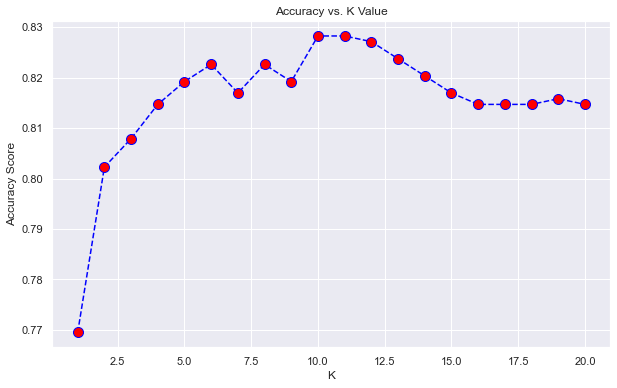

In [48]:
plt.figure(figsize=(10,6))
plt.plot(range(1,21), accuracy, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Score')

In [49]:
k = accuracy.index(max(accuracy)) + 1

In [50]:
from IPython.display import Markdown
Markdown(f"""
#### From the result we can determine that the optimal k- value with the highest score {k}""")


#### From the result we can determine that the optimal k- value with the highest score 10

In [51]:
# Train a KNN model
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train, y_train)

# Predict target values for test data
y_pred = knn_model.predict(X_test)

# Confusion Matrix
knn_matrix = confusion_matrix(y_test, y_pred)

# Evaluate the model's accuracy
knn_acc = round(accuracy_score(y_test, y_pred), 3)
print(f'Accuracy of KNN model is {knn_acc * 100}%')

Accuracy of KNN model is 82.8%


## Confusion matrix for each classification model

For each model we would view which of them performs the best.

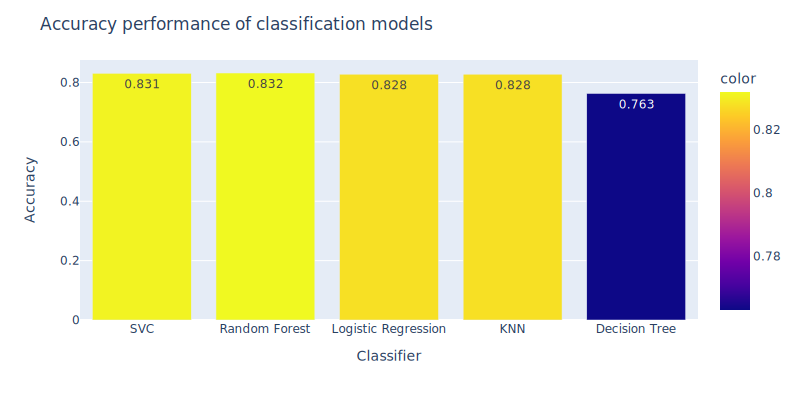

In [52]:
# Bar plot showing each classifier
accuracy_of_models = {'SVC': svm_acc,
                      'Random Forest': rf_acc,
                      'Logistic Regression': lr_acc,
                      'KNN': knn_acc,
                      'Decision Tree': tree_acc}


fig = px.bar(x = list(accuracy_of_models.keys()), y= list(accuracy_of_models.values()),
             color = list(accuracy_of_models.values()),
             width = 800, height = 400,
             color_discrete_sequence=px.colors.qualitative.G10,
             labels={'x':'Classifier', 'y':'Accuracy'}, text_auto=True)


fig.update_layout(title='Accuracy performance of classification models')
fig.write_image('fig.svg', engine='kaleido')
fig.show('svg')

## Viewing the confusion maxtix of the best classifier

In [53]:
# Dictionary for each classifier confusion matrix
cm_of_models = {'SVC': svm_matrix,
                      'Random Forest': rf_matrix,
                      'Logistic Regression': lr_matrix,
                      'KNN': knn_matrix,
                      'Decision Tree':tree_matrix}


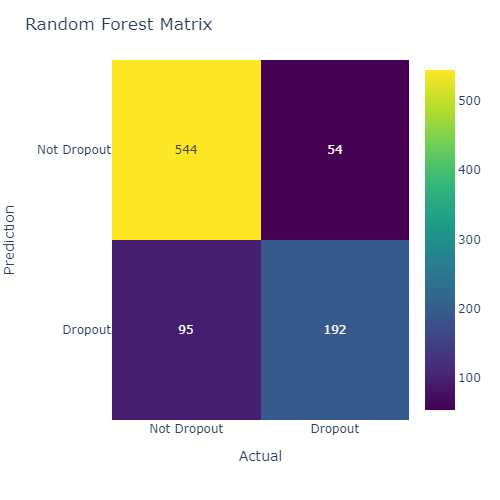

In [54]:
# Find the highest score
scores = [svm_acc, rf_acc, lr_acc, knn_acc, tree_acc]
best_score = max(scores)
best_model = ''

# Generate a heatmap for the classifier that has the highest score
for key, value in accuracy_of_models.items():
  if best_score == value:
    best_model = key
    fig = px.imshow(cm_of_models[key], text_auto=True, aspect="auto",
                    color_continuous_scale='viridis',
                    x=['Not Dropout', 'Dropout'],
                    y = ['Not Dropout', 'Dropout'],
                    labels=dict(x="Actual", y="Prediction"))

    # Update layout and generate image
    fig.update_layout(title = f'{key} Matrix', height=500, width=500)
    fig.write_image('fig.png', engine='kaleido')
    fig.show('png')

    #Pop the best performing model from dictionary
    cm_of_models.pop(key)




Viewing the confusion matrix for other classifiers

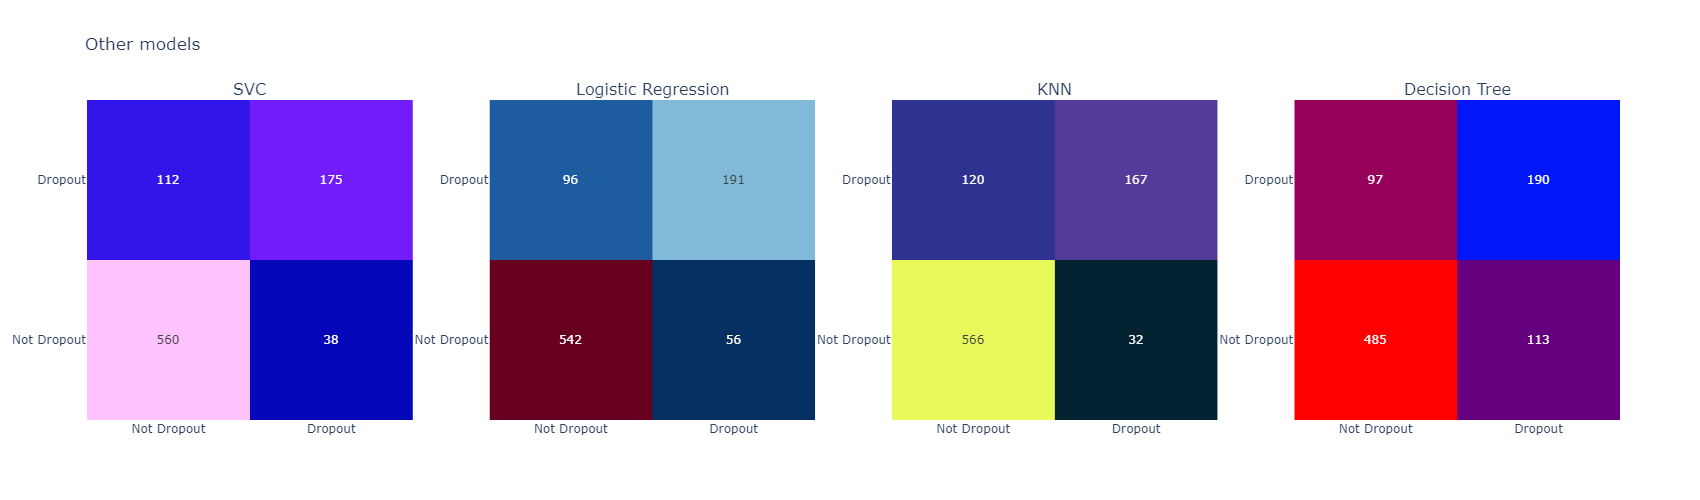

In [55]:
colors = ['plotly3', 'RdBu_r', 'thermal','rainbow']
position = 0

# Create subplots
fig = make_subplots(rows=1, cols=4, subplot_titles=list(cm_of_models.keys()))

for key, value in cm_of_models.items():
    # Add heatmap to the subplot
    heatmap = go.Heatmap(z=cm_of_models[key], text=cm_of_models[key],
                        colorscale=colors[position],
                        x=['Not Dropout', 'Dropout'],
                        y=['Not Dropout', 'Dropout'],
                          texttemplate="%{text}",
                         showscale = False)

    fig.add_trace(heatmap, row=1, col=position+1)

    position += 1

# Update layout
fig.update_layout(height=500, width=1700, title_text="Other models" )

# Generate image
fig.write_image('fig.png', engine='kaleido')
fig.show('png')


In [56]:
Markdown(f"""
#### From the results above we can see that {best_model} perfoms best with the highest accuracy of {round(best_score * 100, 2)}%""")



#### From the results above we can see that Random Forest perfoms best with the highest accuracy of 83.2%